In [ ]:
# 对Github topic应用leiden层次聚类算法

In [1]:
import json
import networkx as nx
import networkx.algorithms as algos
from bs4 import BeautifulSoup
import urllib
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter
import igraph as ig
import leidenalg as la
import matplotlib.pyplot as plt
import cdlib.algorithms as cd
from queue import Queue

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'karateclub', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [2]:
# 读取TopicCooccurrency-mt3.json
with open('TopicCooccurrency-mt3.json', 'r') as ipfile:
    Coocjson = json.loads(ipfile.read())

In [5]:
G = nx.Graph()
for topic, towards in Coocjson.items():
    for toward, times in towards.items():
        if topic != toward:
            G.add_edge(topic, toward, weight=times)
G2 = ig.Graph.from_networkx(G)
partition1 = la.find_partition(G2, la.ModularityVertexPartition, weights='weight')
print(partition1)

Clustering with 17931 elements and 31 clusters
[ 0] 20, 93, 100, 103, 105, 205, 206, 263, 337, 338, 350, 426, 447, 448, 449,
     450, 451, 454, 455, 456, 458, 459, 461, 462, 463, 464, 467, 469, 470,
     471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484,
     487, 488, 489, 491, 492, 493, 494, 495, 497, 498, 499, 500, 501, 502,
     504, 505, 506, 508, 510, 511, 512, 513, 514, 515, 516, 518, 519, 523,
     526, 528, 529, 530, 531, 532, 535, 536, 537, 538, 539, 540, 541, 542,
     543, 544, 545, 546, 547, 548, 549, 550, 552, 575, 576, 607, 619, 649,
     678, 729, 767, 792, 809, 862, 904, 927, 935, 992, 999, 1005, 1007, 1008,
     1029, 1032, 1093, 1099, 1123, 1124, 1125, 1126, 1127, 1152, 1153, 1154,
     1168, 1210, 1218, 1220, 1229, 1230, 1231, 1232, 1236, 1237, 1254, 1301,
     1302, 1334, 1335, 1375, 1376, 1377, 1384, 1391, 1401, 1407, 1438, 1445,
     1460, 1494, 1495, 1496, 1497, 1536, 1576, 1590, 1693, 1704, 1706, 1727,
     1734, 1739, 1751, 1799, 1800, 1802

In [15]:
# ig.plot(partition)
fig, ax = plt.subplots()
ig.plot(partition, target=ax)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001DBEB52C318> (for post_execute):


KeyboardInterrupt: 

In [81]:
print(partition1)

Clustering with 17931 elements and 23 clusters
[ 0] 10, 11, 12, 13, 14, 15, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 38, 39,
     41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54, 55, 56, 57, 58, 59, 60,
     61, 62, 63, 64, 65, 70, 71, 75, 76, 77, 79, 80, 83, 85, 86, 87, 88, 89,
     90, 101, 103, 104, 105, 106, 109, 110, 113, 114, 117, 118, 120, 122, 123,
     124, 125, 126, 127, 128, 132, 134, 135, 136, 137, 139, 145, 146, 147,
     148, 149, 150, 152, 153, 155, 157, 159, 162, 163, 164, 165, 166, 169,
     170, 171, 172, 173, 177, 180, 181, 182, 183, 184, 185, 186, 188, 191,
     194, 197, 198, 199, 200, 201, 202, 203, 208, 220, 221, 222, 223, 224,
     225, 226, 229, 230, 231, 232, 233, 234, 237, 249, 250, 251, 259, 268,
     271, 285, 288, 289, 323, 326, 329, 347, 349, 353, 356, 368, 378, 397,
     407, 434, 435, 490, 517, 551, 554, 555, 556, 558, 560, 562, 564, 565,
     566, 567, 568, 569, 570, 571, 572, 584, 586, 593, 594, 595, 604, 605,
     607, 608, 610, 611, 616, 617, 618, 620

In [18]:
key_list = list(Coocjson.keys())

In [20]:
key_list

['centos7',
 'ansible',
 'packer',
 'box',
 'installation',
 'virtualbox',
 'vagrant',
 'centos',
 'bukkit-plugin',
 'essential',
 'minecraft-plugin',
 'spigot-plugin',
 'paper',
 'java',
 'hacktoberfest',
 'minecraft',
 'bukkit',
 'minecraft-server',
 'discord',
 'spigot',
 'authentication',
 'php',
 'login-system',
 'users',
 'web-framework',
 'user-management',
 'swift-framework',
 'webrtc',
 'swift3',
 'minimap',
 'terminal',
 'command-line-interface',
 'thumbnail',
 'vim',
 'tool',
 'documentation',
 'swagger',
 'openapi',
 'openapi3',
 'api',
 'dotnet5',
 'dotnet7',
 'dotnet6',
 'c#',
 'dotnetstandard',
 'go',
 'tools',
 'analyzer',
 'ci-cd',
 'devsecops',
 'threat-hunting',
 'malware',
 'inversion-of-control',
 'yara',
 'grafana-dashboard',
 'datadog',
 'oncall',
 'embeds',
 'incidents',
 'pager',
 'monitor',
 'incident-management',
 'widget',
 'docker',
 'schedule',
 'pagerduty',
 'grafana',
 'dashboard',
 'gist',
 'build-pipelines',
 'powershell-modules',
 'powershell',
 'cont

In [73]:
id = input()
G2.vs[int(id)]

igraph.Vertex(<igraph.Graph object at 0x000001DBEB6C8488>, 10, {'_nx_name': 'nginx'})

In [29]:
print(partition.membership)

[7, 7, 7, 3, 3, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 0, 1, 6, 2, 3, 6, 1, 1, 1, 1, 1, 6, 1, 7, 5, 7, 6, 6, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 8, 1, 1, 3, 3, 1, 11, 1, 1, 1, 1, 1, 1, 6, 3, 0, 3, 6, 3, 3, 3, 3, 0, 1, 7, 1, 1, 1, 1, 8, 3, 1, 1, 3, 2, 1, 1, 11, 0, 1, 6, 6, 1, 3, 1, 1, 1, 1, 1, 1, 1, 8, 1, 3, 1, 3, 1, 1, 1, 1, 7, 1, 7, 3, 2, 1, 8, 1, 1, 4, 1, 1, 1, 4, 1, 1, 7, 1, 7, 1, 1, 1, 2, 7, 1, 1, 1, 6, 1, 5, 3, 1, 6, 1, 1, 1, 1, 7, 9, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 2, 1, 7, 7, 1, 2, 6, 1, 1, 1, 1, 1, 1, 1, 6, 0, 0, 7, 1, 7, 7, 7, 7, 7, 3, 11, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 7, 11, 1, 1, 1, 1, 1, 1, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9, 7, 3, 2, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 7, 1, 7, 3, 3, 7, 7, 7, 11, 4, 7, 4, 11, 7, 7, 1, 7, 7, 1, 6, 5, 7, 7, 2, 3, 4, 5, 5, 3, 7, 7, 8, 5, 2, 7, 2, 2, 2, 7, 7, 3, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 7, 1, 7, 7, 1, 4, 

In [32]:
G2.vs[17929]

igraph.Vertex(<igraph.Graph object at 0x000001DBEB6C8488>, 17929, {'_nx_name': '996'})

In [7]:
rgroup = [(0, 0)] * 37
for node in range(17931):
    nodename = G2.vs['_nx_name'][node]
    cid = partition1.membership[node]
    times = Coocjson[nodename][nodename]
    if times > rgroup[cid][1]:
        rgroup[cid] = (nodename, times)
rgroup


[('python', 7165),
 ('javascript', 6372),
 ('hacktoberfest', 5928),
 ('android', 4037),
 ('linux', 2333),
 ('video', 758),
 ('c', 1237),
 ('security', 2246),
 ('raspberry-pi', 466),
 ('blockchain', 665),
 ('http', 757),
 ('php', 2685),
 ('awesome', 1389),
 ('c#', 1352),
 ('dictionary', 272),
 ('compression', 186),
 ('covid-19', 121),
 ('qrcode', 93),
 ('interactive-fiction', 12),
 ('garmin', 7),
 ('42', 6),
 ('streamdeck', 10),
 ('community-contributions-paused', 13),
 ('aliyundrive', 5),
 ('scpi', 6),
 ('rockchip', 6),
 ('qiangguo', 4),
 ('tt-rss', 6),
 ('asdf', 7),
 ('implicit', 5),
 ('996', 6),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0)]

In [11]:
for node in range(17931):
    if G2.vs['_nx_name'][node] == 'java':
        print(node)
        break

230


In [77]:
with open('Partition/0.json', 'w') as opfile:
    opfile.write(json.dumps(partition.membership))

In [78]:
totalnum = 0
for topic, towards in Coocjson.items():
    totalnum += towards[topic]
totalnum

518415

In [79]:
coocpmi = {}
for topic, towards in Coocjson.items():
    lt = towards[topic]
    cpmi = {}
    for toward in towards:
        pmi = math.log2(towards[toward] * totalnum / (lt * Coocjson[toward][toward]))
        cpmi[toward] = -pmi / math.log2(towards[toward]/totalnum)
    coocpmi[topic] = cpmi
with open('TopicCooccurrency-npmi.json', 'w') as opfile:
    opfile.write(json.dumps(coocpmi))

In [110]:
G0 = nx.Graph()
for topic, towards in coocpmi.items():
    for toward, times in towards.items():
        if topic != toward and times > 0:
            G0.add_edge(topic, toward, weight=times)
G1 = ig.Graph.from_networkx(G0)
partition0 = la.find_partition(G1, la.ModularityVertexPartition, weights='weight')
print(partition0)

Clustering with 17931 elements and 37 clusters
[ 0] 22, 23, 25, 51, 56, 103, 104, 105, 112, 113, 142, 147, 160, 170, 190,
     248, 289, 293, 303, 305, 306, 307, 336, 339, 340, 341, 342, 347, 353,
     356, 360, 361, 362, 363, 364, 365, 367, 370, 371, 392, 436, 452, 490,
     525, 584, 589, 592, 614, 630, 653, 654, 661, 665, 670, 671, 698, 724,
     737, 745, 747, 749, 751, 752, 772, 773, 775, 777, 778, 807, 811, 816,
     837, 838, 839, 849, 852, 857, 866, 867, 868, 872, 877, 891, 897, 900,
     906, 910, 913, 928, 929, 930, 931, 936, 939, 940, 951, 952, 957, 971,
     972, 973, 975, 976, 981, 983, 1051, 1052, 1054, 1061, 1065, 1068, 1070,
     1097, 1105, 1106, 1107, 1108, 1109, 1142, 1143, 1144, 1171, 1180, 1181,
     1184, 1203, 1213, 1216, 1237, 1238, 1265, 1267, 1270, 1271, 1289, 1297,
     1310, 1318, 1319, 1320, 1322, 1324, 1325, 1326, 1344, 1346, 1348, 1399,
     1415, 1416, 1417, 1418, 1422, 1423, 1425, 1453, 1454, 1467, 1468, 1480,
     1508, 1509, 1516, 1519, 1522, 1523, 15

In [90]:
print(partition)

Clustering with 17931 elements and 24 clusters
[ 0] 10, 11, 12, 13, 14, 15, 19, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32,
     38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54, 55, 56, 57, 58,
     59, 60, 61, 62, 63, 64, 65, 70, 71, 75, 76, 77, 79, 80, 83, 85, 86, 87,
     88, 89, 90, 101, 103, 104, 105, 106, 109, 110, 113, 114, 117, 118, 120,
     122, 123, 124, 125, 126, 127, 128, 132, 134, 135, 136, 137, 139, 143,
     145, 146, 147, 148, 149, 150, 152, 153, 155, 157, 159, 160, 162, 163,
     164, 165, 166, 169, 170, 171, 172, 173, 174, 177, 180, 181, 182, 183,
     184, 185, 186, 188, 191, 194, 196, 197, 198, 199, 200, 201, 202, 203,
     208, 220, 221, 222, 223, 224, 225, 226, 229, 230, 232, 233, 234, 237,
     249, 250, 251, 257, 259, 268, 271, 285, 288, 289, 323, 326, 329, 347,
     349, 353, 356, 359, 368, 378, 386, 393, 394, 396, 397, 399, 407, 434,
     435, 490, 517, 554, 555, 556, 558, 560, 562, 564, 565, 566, 567, 568,
     569, 570, 571, 572, 584, 586, 593, 594, 

In [94]:
Gt = nx.karate_club_graph()

In [98]:
print(Gt.edges.data())

[(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 5, {}), (0, 6, {}), (0, 7, {}), (0, 8, {}), (0, 10, {}), (0, 11, {}), (0, 12, {}), (0, 13, {}), (0, 17, {}), (0, 19, {}), (0, 21, {}), (0, 31, {}), (1, 2, {}), (1, 3, {}), (1, 7, {}), (1, 13, {}), (1, 17, {}), (1, 19, {}), (1, 21, {}), (1, 30, {}), (2, 3, {}), (2, 7, {}), (2, 8, {}), (2, 9, {}), (2, 13, {}), (2, 27, {}), (2, 28, {}), (2, 32, {}), (3, 7, {}), (3, 12, {}), (3, 13, {}), (4, 6, {}), (4, 10, {}), (5, 6, {}), (5, 10, {}), (5, 16, {}), (6, 16, {}), (8, 30, {}), (8, 32, {}), (8, 33, {}), (9, 33, {}), (13, 33, {}), (14, 32, {}), (14, 33, {}), (15, 32, {}), (15, 33, {}), (18, 32, {}), (18, 33, {}), (19, 33, {}), (20, 32, {}), (20, 33, {}), (22, 32, {}), (22, 33, {}), (23, 25, {}), (23, 27, {}), (23, 29, {}), (23, 32, {}), (23, 33, {}), (24, 25, {}), (24, 27, {}), (24, 31, {}), (25, 31, {}), (26, 29, {}), (26, 33, {}), (27, 33, {}), (28, 31, {}), (28, 33, {}), (29, 32, {}), (29, 33, {}), (30, 32, {}), (30, 33, {}), (31, 32, {})

In [104]:
G0 = nx.Graph()
for topic, towards in coocpmi.items():
    for toward, times in towards.items():
        if topic != toward and times > 0:
            G0.add_edge(topic, toward, weight=times)

In [107]:
partition = cd.leiden(G,
                      weights='weight')
print(partition.communities)

[['python', 'molecule', 'tutorial', 'django', 'django-rest-framework', 'celery', 'ipython', 'jupyter-notebook', 'python-3.x', 'julia-language', 'julia', 'r', 'paper', 'deep-learning', 'visual-tracking', 'survey', 'nlp', 'style-transfer', 'speech-recognition', 'computer-vision', 'artificial-intelligence', 'pretrained-models', 'reinforcement-learning', 'neural-network', 'tensorflow', 'transformer-model', 'bert-language-model', 'nms', 'cvpr', 'statistics', 'opencv', 'research', 'pytorch', 'attention', 'dataset', 'machine-learning', 'optimization', 'speech-synthesis', 'text-to-speech', 'generative-model', 'generative-adversarial-network', 'cvpr2020', 'image-manipulation', 'image-processing', 'commonsense', 'robotics', 'language-model', 'summary', 'recurrent-neural-network', 'mnist', 'arxiv', 'deep-neural-networks', 'machine-learning-algorithms', 'data-science', 'papers', 'unsupervised-learning', 'transfer-learning', 'domain-adaptation', 'research-paper', 'speech-separation', 'speech-enhanc

In [3]:
G = nx.Graph()
for topic, towards in Coocjson.items():
    for toward, times in towards.items():
        if topic != toward:
            G.add_edge(topic, toward, weight=times)

In [ ]:
rgroup = [(0, 0)] * 31
for node in range(17931):
    nodename = G2.vs['_nx_name'][node]
    cid = partition.membership[node]
    times = Coocjson[nodename][nodename]
    if times > rgroup[cid][1]:
        rgroup[cid] = (nodename, times)
rgroup


In [108]:
for com in partition.communities:
    mt = 0
    for topic in com:
        if Coocjson[topic][topic] > mt:
            mt = Coocjson[topic][topic]
            ms = topic
    print(ms, mt, len(com))

python 7165 2987
hacktoberfest 5928 2339
javascript 6372 2066
linux 2333 1485
video 758 1343
rust 2175 1330
android 4037 1193
security 2246 1189
raspberry-pi 466 641
php 2685 575
c# 1352 557
blockchain 665 556
http 757 534
awesome 1389 533
testing 889 374
dictionary 272 141
covid-19 121 28
qrcode 93 25
interactive-fiction 12 8
garmin 7 3
42 6 3
streamdeck 10 3
community-contributions-paused 13 2
aliyundrive 5 2
scpi 6 2
rockchip 6 2
qiangguo 4 2
tt-rss 6 2
asdf 7 2
implicit 5 2
996 6 2


In [118]:
for com in partition.communities:
    mt = 0
    for topic in com:
        if G.degree[topic] > mt:
            mt = G.degree[topic]
            ms = topic
    print(ms, mt, len(com))

python 4593 2987
hacktoberfest 4042 2339
javascript 3657 2066
linux 2110 1485
video 764 1343
rust 1294 1330
android 2379 1193
security 1754 1189
iot 489 641
php 1698 575
c# 1156 557
cryptography 491 556
networking 712 534
awesome 1054 533
testing 652 374
dictionary 260 141
covid-19 82 28
qrcode 97 25
interactive-fiction 11 8
cycling 2 3
42 2 3
streamdeck 3 3
exercism-track 1 2
aliyundrive 1 2
scpi 1 2
amlogic 1 2
qiangguo 1 2
tt-rss 1 2
asdf 1 2
representation 1 2
996icu 1 2


In [12]:
queue_obj = Queue()
queue_obj.put(G)
ps = []
rep = []
while not queue_obj.empty():
    curG = queue_obj.get()
    partition = cd.leiden(curG, weights='weight')
    if len(partition.communities) == 1:
        continue
    ps.append(partition.communities)
    for com in partition.communities:
        subG = curG.subgraph(com)
        md = 0
        for node in subG.nodes:
            if subG.degree[node] > md:
                md = subG.degree[node]
                mt = node
        rep.append((mt, len(com)))
        if len(com) > 3 and not nx.is_tree(subG):
            queue_obj.put(subG)
    print(queue_obj.qsize())
with open('Partition/fre.json', 'w') as opfile:
    opfile.write(json.dumps(ps))
with open('Partition/rep.json', 'w') as opfile:
    opfile.write(json.dumps(rep))

17
29
40
53
64
75
85
96
116
129
136
148
152
157
161
165
166
173
181
192
199
207
213
219
224
227
230
231
232
235
241
247
253
260
266
271
274
279
281
282
282
289
298
303
308
312
318
322
326
327
327
328
326
332
342
350
354
361
366
372
377
379
383
386
391
395
401
407
414
418
422
427
429
433
435
435
443
448
453
460
466
469
472
476
477
478
478
482
488
495
501
508
513
518
521
523
525
527
529
534
539
544
547
549
553
555
559
561
562
563
565
566
566
566
565
567
572
575
576
578
581
583
586
587
589
591
592
596
599
605
609
612
613
613
617
620
625
628
632
635
636
636
637
638
638
638
640
641
642
644
644
646
648
649
650
650
650
651
652
653
652
654
655
654
655
656
659
666
670
675
678
683
686
686
685
689
690
694
697
699
701
704
706
706
708
711
714
717
719
720
722
723
724
726
728
730
732
734
735
736
736
739
741
744
746
748
749
749
749
751
754
758
760
761
762
764
766
768
770
771
770
772
773
775
776
776
777
778
779
780
781
780
779
778
778
783
786
790
794
796
799
805
808
811
813
814
815
817
819
822
825
825


In [5]:
print(com)

['cms-detector', 'wordpress-scanner', 'geo-ip', 'whois-lookup', 'reverse-ip-scan']


In [11]:
print(subG.nodes)

[]


In [14]:
print(curG)

Graph with 4 nodes and 4 edges


In [13]:
print(curG.nodes)

['domain-adaptation', 'generalization', 'transfer-learning', 'domain-generalization']


In [15]:
print(curG.edges.data())

[('domain-adaptation', 'transfer-learning', {'weight': 14}), ('domain-adaptation', 'domain-generalization', {'weight': 3}), ('generalization', 'transfer-learning', {'weight': 2}), ('generalization', 'domain-generalization', {'weight': 2})]


In [17]:
partest = cd.leiden(curG, weights='weight')

ValueError: invalid literal for int() with base 10: 'domain-adaptation'

In [8]:
with open('Partition/fre.json', 'w') as opfile:
    opfile.write(json.dumps(ps))
with open('Partition/rep.json', 'w') as opfile:
    opfile.write(json.dumps(rep))

In [9]:
G1 = nx.Graph()
G1.add_edge('m', 'domain-generalization', weight = 3)
G1.add_edge('m', 'transfer-learning', weight = 14)
G1.add_edge('generalization', 'transfer-learning', weight = 2)
# G1.add_edge('generalization', 'domain-generalization', weight = 2)
ptest = cd.leiden(G1, weights='weight')

In [10]:
print(ptest.communities)

[['m', 'domain-generalization', 'transfer-learning', 'generalization']]


In [19]:
print(G1.edges.data())

[(1, 2, {'weight': 3}), (1, 4, {'weight': 14}), (2, 3, {'weight': 2}), (4, 3, {'weight': 2})]


In [25]:
ptest1 = cd.leiden(G, weights='weight')

In [17]:
pnodes =  [
            "bluepill",
            "dma",
            "analog-devices",
            "zynq"
        ]
subG = G.subgraph(pnodes)
ptest = cd.leiden(subG, weights='weight')
print(ptest.communities)

[['bluepill', 'dma'], ['analog-devices', 'zynq']]


In [14]:
len(ptest.communities)

1

In [18]:
print(subG)

Graph with 4 nodes and 4 edges


In [19]:
print(subG.edges.data())

[('analog-devices', 'zynq', {'weight': 2}), ('analog-devices', 'dma', {'weight': 2}), ('bluepill', 'dma', {'weight': 2}), ('dma', 'zynq', {'weight': 2})]


In [5]:
queue_obj = Queue()
G = nx.Graph()
for topic, towards in Coocjson.items():
    for toward, times in towards.items():
        if topic != toward:
            G.add_edge(topic, toward, weight=times)
queue_obj.put(ig.Graph.from_networkx(G))
ps = []
rep = []
while not queue_obj.empty():
    curG = queue_obj.get()
    # G2 = ig.Graph.from_networkx(curG)
    partition1 = la.find_partition(curG, la.ModularityVertexPartition, weights='weight', n_iterations=-1)
    membership = partition1.membership
    n_communities = len(set(membership))
    # partition = cd.leiden(curG, weights='weight')
    if n_communities == 1:
        continue
    communities = []
    for community_id in range(n_communities):
        community_members = [i for i, c in enumerate(membership) if c == community_id]
        community_member_names = []
        for i in community_members:
            community_member_names.append(curG.vs['_nx_name'][i])
        communities.append(community_member_names)

        subG = curG.subgraph(community_members)
        strengths = subG.strength()
        max_strength = max(strengths)
        node_index = strengths.index(max_strength)
        # md = 0
        # for node in subG.nodes:
        #     if subG.degree[node] > md:
        #         md = subG.degree[node]
        #         mt = node
        rep.append((curG.vs['_nx_name'][node_index], len(community_members)))
        if len(community_members) > 3 and not subG.is_tree():
            queue_obj.put(subG)
    ps.append(communities)
    # for com in partition.communities:
    #     subG = curG.subgraph(com)
    #     md = 0
    #     for node in subG.nodes:
    #         if subG.degree[node] > md:
    #             md = subG.degree[node]
    #             mt = node
    #     rep.append((mt, len(com)))
    #     if len(com) > 3 and not nx.is_tree(subG):
    #         queue_obj.put(subG)
    print(queue_obj.qsize())
with open('Partition/fre.json', 'w') as opfile:
    opfile.write(json.dumps(ps))
with open('Partition/rep.json', 'w') as opfile:
    opfile.write(json.dumps(rep))

18
30
38
51
61
73
84
95
105
116
128
141
147
154
160
163
167
168
176
184
194
202
208
212
218
223
226
228
230
233
234
241
245
253
258
265
269
274
278
281
289
295
300
305
310
312
320
325
329
335
337
339
341
344
350
357
364
370
375
379
381
382
384
384
391
397
400
405
410
414
417
421
425
427
430
430
430
435
443
450
453
456
463
467
470
471
473
474
473
477
483
488
493
498
502
505
508
509
509
509
509
513
519
525
529
534
538
543
547
549
551
553
559
564
567
569
572
574
577
580
582
585
588
590
594
597
600
604
607
610
611
613
614
615
614
617
621
624
627
628
630
632
635
636
637
637
637
639
641
644
648
651
652
657
660
666
670
675
676
676
678
679
681
682
683
683
683
684
686
686
686
687
688
688
687
688
694
698
703
705
708
710
712
713
714
719
724
728
731
733
737
740
741
745
747
750
752
752
752
750
749
748
752
754
756
757
759
761
761
761
763
766
768
768
769
769
771
773
776
778
779
782
784
786
787
788
788
787
789
790
791
792
792
792
793
793
794
794
795
795
795
796
796
796
796
797
801
803
804
805
804
806


In [3]:
G = nx.Graph()
for topic, towards in Coocjson.items():
    for toward, times in towards.items():
        if topic != toward:
            G.add_edge(topic, toward, weight=times)

In [4]:
G2 = ig.Graph.from_networkx(G)
namedict = {}
for node in range(17931):
    nodename = G2.vs['_nx_name'][node]
    namedict[nodename] = node

In [18]:
pnodes =  [
    "audio",
    "audio-processing",
    "ladspa",
    "shazam",
    "audio-production"
   ]
pnodesid = [namedict[name] for name in pnodes]
# G2 = ig.Graph.from_networkx(G)
subG = G2.subgraph(pnodesid)


In [ ]:
# ig.plot(subG)
print(subG.es)
ptest = la.find_partition(subG, la.ModularityVertexPartition, weights='weight', n_iterations=-1)
print(ptest, ptest.modularity)


In [88]:
p2 = la.find_partition(subG, la.RBConfigurationVertexPartition, weights='weight', resolution_parameter=1, n_iterations=-1)
print(p2, p2.modularity)

Clustering with 84 elements and 1 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
    75, 76, 77, 78, 79, 80, 81, 82, 83 0.0


In [78]:
p2 = la.find_partition(subG, la.RBConfigurationVertexPartition, weights='weight', resolution_parameter=1.84, n_iterations=-1)
print(p2, p2.modularity)

Clustering with 77 elements and 16 clusters
[ 0] 0, 1, 3, 4, 8, 11, 13, 15, 16, 17, 18, 21, 23, 24, 29, 30, 31, 34, 41,
     42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61,
     62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76
[ 1] 12, 19, 33, 63
[ 2] 6, 32, 47
[ 3] 2, 9, 38
[ 4] 7, 26, 54
[ 5] 20, 27
[ 6] 5, 25
[ 7] 10
[ 8] 14
[ 9] 22
[10] 28
[11] 35
[12] 36
[13] 37
[14] 39
[15] 40 0.200151502398788


In [79]:
p2.sizes()

[51, 4, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [42]:
hierarchy = la.find_partition_hierarchy(
    G2,
    la.ModularityVertexPartition
)

AttributeError: module 'leidenalg' has no attribute 'find_partition_hierarchy'

In [44]:
print(la.__version__)

AttributeError: module 'leidenalg' has no attribute '__version__'

In [19]:
print(ptest.quality(), p2.quality())

0.03012858107860432 1417.8


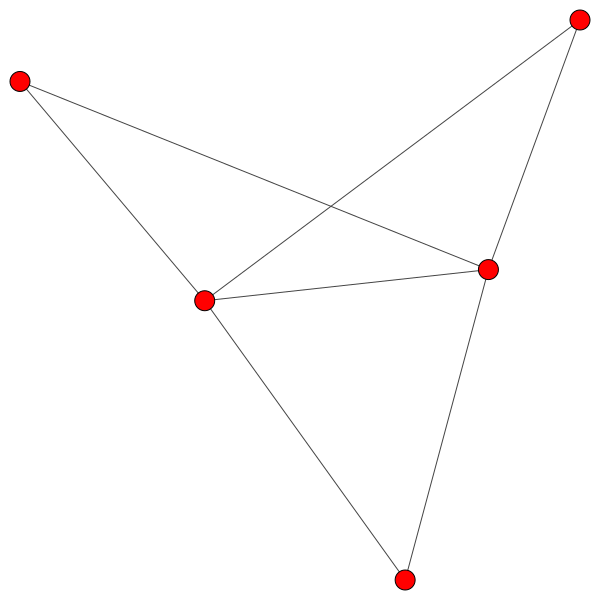

In [19]:
ig.plot(subG)

In [28]:
for edge in subG.es:
    print(edge.source, edge.target, edge.attributes())

0 1 {'weight': 4}
0 2 {'weight': 376}
0 3 {'weight': 3}
0 4 {'weight': 3}
0 5 {'weight': 7}
0 6 {'weight': 2}
2 6 {'weight': 3}
0 7 {'weight': 8}
2 7 {'weight': 2}
0 8 {'weight': 6}
0 9 {'weight': 2}
0 10 {'weight': 5}
2 10 {'weight': 2}
0 11 {'weight': 3}
0 12 {'weight': 4}
0 13 {'weight': 2}
0 14 {'weight': 2}
0 15 {'weight': 5}
0 16 {'weight': 4}
2 16 {'weight': 2}
0 17 {'weight': 3}
0 18 {'weight': 2}
0 19 {'weight': 6}
2 19 {'weight': 4}
0 20 {'weight': 3}
0 21 {'weight': 3}
0 22 {'weight': 2}
0 23 {'weight': 6}
0 24 {'weight': 4}
2 24 {'weight': 2}
0 25 {'weight': 4}
2 25 {'weight': 2}
0 26 {'weight': 4}
2 26 {'weight': 3}
0 27 {'weight': 3}
2 27 {'weight': 3}
0 28 {'weight': 4}
2 28 {'weight': 2}
0 29 {'weight': 8}
2 29 {'weight': 3}
0 30 {'weight': 2}
0 31 {'weight': 3}
0 32 {'weight': 2}
0 33 {'weight': 3}
0 34 {'weight': 2}
0 35 {'weight': 2}
0 36 {'weight': 2}
0 37 {'weight': 5}
0 38 {'weight': 3}
0 39 {'weight': 4}
0 40 {'weight': 4}
0 41 {'weight': 2}
0 42 {'weight': 2}
0 

In [27]:
for vertex in subG.vs:
    print(vertex.index, vertex.attributes())

0 {'_nx_name': 'android'}
1 {'_nx_name': 'proguard'}
2 {'_nx_name': 'android-library'}
3 {'_nx_name': 'xml-layout'}
4 {'_nx_name': 'android-things'}
5 {'_nx_name': 'source-code'}
6 {'_nx_name': 'pinview'}
7 {'_nx_name': 'android-apps'}
8 {'_nx_name': 'bubble'}
9 {'_nx_name': 'native-libraries'}
10 {'_nx_name': 'permission-android'}
11 {'_nx_name': 'study-guide'}
12 {'_nx_name': 'microg'}
13 {'_nx_name': '2022'}
14 {'_nx_name': 'names'}
15 {'_nx_name': 'android-source'}
16 {'_nx_name': 'muzei'}
17 {'_nx_name': 'googleplay'}
18 {'_nx_name': 'gesture-detection'}
19 {'_nx_name': 'android-libs'}
20 {'_nx_name': 'horizontal'}
21 {'_nx_name': 'moe'}
22 {'_nx_name': 'keepalive'}
23 {'_nx_name': 'fresco'}
24 {'_nx_name': 'shared-preferences'}
25 {'_nx_name': 'deep-links'}
26 {'_nx_name': 'swipe-gestures'}
27 {'_nx_name': 'android-debug'}
28 {'_nx_name': 'searchview'}
29 {'_nx_name': 'drawable'}
30 {'_nx_name': 'lowpoly'}
31 {'_nx_name': 'picker-library'}
32 {'_nx_name': 'persistent-data'}
33 {'

In [17]:
ptest.modularity

0.11111111111111113

In [13]:
modularity = ptest.modularity
for i in range(max(ptest.membership) + 1):
    print(f"Module {i}: {modularity[i]}")

TypeError: 'float' object is not subscriptable

In [21]:
gtest = ig.Graph(5, [(0, 1), (0, 2), (1, 2), (2, 3), (0, 3), (1, 3), (2, 4)])
pgtest = la.find_partition(gtest, la.ModularityVertexPartition, n_iterations=-1)
print(pgtest)

Clustering with 5 elements and 2 clusters
[0] 0, 1, 3
[1] 2, 4


In [37]:
queue_obj = Queue()
# G = nx.Graph()
# for topic, towards in Coocjson.items():
#     for toward, times in towards.items():
#         if topic != toward:
#             G.add_edge(topic, toward, weight=times)
queue_obj.put(ig.Graph.from_networkx(G))
ps = []
rep = []
while not queue_obj.empty():
    curG = queue_obj.get()
    # G2 = ig.Graph.from_networkx(curG)
    partition1 = la.find_partition(curG, la.CPMVertexPartition, weights='weight', resolution_parameter=0.5, n_iterations=-1)
    membership = partition1.membership
    n_communities = len(set(membership))
    # partition = cd.leiden(curG, weights='weight')
    if n_communities == 1:
        continue
    communities = []
    for community_id in range(n_communities):
        community_members = [i for i, c in enumerate(membership) if c == community_id]
        community_member_names = []
        for i in community_members:
            community_member_names.append(curG.vs['_nx_name'][i])
        communities.append(community_member_names)

        subG = curG.subgraph(community_members)
        strengths = subG.strength()
        max_strength = max(strengths)
        node_index = strengths.index(max_strength)
        # md = 0
        # for node in subG.nodes:
        #     if subG.degree[node] > md:
        #         md = subG.degree[node]
        #         mt = node
        rep.append((curG.vs['_nx_name'][node_index], len(community_members)))
        if len(community_members) > 3 and not subG.is_tree():
            queue_obj.put(subG)
    ps.append(communities)
    # for com in partition.communities:
    #     subG = curG.subgraph(com)
    #     md = 0
    #     for node in subG.nodes:
    #         if subG.degree[node] > md:
    #             md = subG.degree[node]
    #             mt = node
    #     rep.append((mt, len(com)))
    #     if len(com) > 3 and not nx.is_tree(subG):
    #         queue_obj.put(subG)
    print(queue_obj.qsize())
with open('Partition/freCPM.json', 'w') as opfile:
    opfile.write(json.dumps(ps))
with open('Partition/repCPM.json', 'w') as opfile:
    opfile.write(json.dumps(rep))

1084
1071
1069
1056
1025
985
973
953
951
935
935
873
866
839
822
811
798
795
777
777
776
733
684
683
681
671
663
654
652
620
611
608
604
595
591
586
579
579
484
480
480
477
476
464
463
462
456
456
453
436
431
425
417
407
395
392
389
368
363
352
346
344
340
330
323
301


In [23]:
# 读取同义词映射
with open('Topic-Reflection.json', 'r') as ipfile:
    Topic_Refl = json.loads(ipfile.read())

In [22]:
with open('ActualFeaturedTopics.json', 'r') as ipfile:
    featuredTopics = json.loads(ipfile.read())

In [24]:
corTopics = [Topic_Refl[topic] if topic in Topic_Refl.keys() else topic for topic in featuredTopics]
print(corTopics)

['3d', 'ajax', 'algorithm', 'android', 'angular', 'ansible', 'api', 'atom', 'amazon-web-services', 'azure', 'babel', 'bash', 'bitcoin', 'bootstrap', 'bots', 'google-chrome', 'chrome-extension', 'command-line-interface', 'clojure', 'compiler-construction', 'continuous-integration', 'cryptocurrency', 'crystal-reports', 'css', 'data-structures', 'visualization', 'database', 'deep-learning', 'deployment', 'django', 'docker', 'documentation', '.net', 'elixir', 'emacs', 'ember.js', 'emoji', 'emulation', 'ecmascript-6', 'eslint', 'ethereum', 'express', 'firebase', 'firefox', 'flask', 'fonts', 'frameworks', 'frontend', 'game-engine', 'git', 'github-api', 'google', 'gradle', 'graphql', 'gulp', 'homebrew', 'homebridge', 'http', 'ios', 'ipfs', 'jekyll', 'jquery', 'json', 'jupyter-notebook', 'koa', 'kubernetes', 'laravel', 'latex', 'library', 'linux', 'localization', 'lua', 'machine-learning', 'macos', 'markdown', 'material-design', 'matlab', 'maven', 'minecraft', 'mobile', 'monero', 'mongodb', 'm

In [ ]:
with open('corFeaturedTopics.json', 'w') as opfile:
    opfile.write(json.dumps(corTopics, indent=1))

In [8]:
# check if there are same topics in corTopics
for i in range(len(corTopics)):
    for j in range(i + 1, len(corTopics)):
        if corTopics[i] == corTopics[j]:
            print(i, j, corTopics[i])

In [4]:
with open('Partition/fre.json', 'r') as ipfile:
    ps = json.loads(ipfile.read())


In [ ]:
nps = []
corset = set(corTopics)
for a in ps:
    na = []
    for b in a:
        nb = []
        for c in b:
            if c in corset:
                nb.append(c)
        if len(nb) > 0:
            na.append(nb)
    if len(na) > 0:
        nps.append(na)
with open('Partition/freFeatured.json', 'w') as opfile:
    opfile.write(json.dumps(nps))

In [ ]:
nps = []
corset = set(corTopics)
for a in pps:
    na = []
    for b in a:
        nb = []
        for c in b:
            if c in corset:
                nb.append(c)
        if len(nb) > 0:
            na.append(nb)
    if len(na) > 0:
        nps.append(na)
with open('Partition/freFeatured.json', 'w') as opfile:
    opfile.write(json.dumps(nps))

In [12]:
fdict = {}
nnnps = []

for a in nnps:
    na = []
    for b in a:
        if b[0] in fdict.keys() and fdict[b[0]] == len(b):
            continue
        fdict[b[0]] = len(b)
        na.append(b)
    if len(na) > 0:
        nnnps.append(na)
with open('Partition/freFeatured.json', 'w') as opfile:
    opfile.write(json.dumps(nnnps, indent=1))

In [14]:
print(nnnps[0])

[['python', 'django', 'jupyter-notebook', 'julia', 'r', 'deep-learning', 'nlp', 'tensorflow', 'machine-learning', 'visualization', 'matlab', 'flask', 'wagtail', 'scikit-learn'], ['mysql', 'ansible', 'kubernetes', 'docker', 'hacktoberfest', 'deployment', 'terraform', 'postgresql', 'sql', 'database', 'amazon-web-services', 'go', 'azure', 'serverless', 'ruby', 'ruby-on-rails', 'monitoring', 'continuous-integration', 'java', 'spring-boot', 'maven', 'mongodb', 'elixir', 'nosql', 'scala', 'github-api', 'code-review', 'crystal-reports'], ['api', 'frontend', 'node.js', 'reactjs', 'testing', 'npm', 'javascript', 'vue.js', 'webpack', 'sass', 'eslint', 'frameworks', 'electron', 'typescript', 'bootstrap', 'html', 'css', 'rest', 'web-applications', 'graphql', 'documentation', 'progressive-web-apps', 'jquery', 'angular', 'google-chrome', 'ecmascript-6', 'web-components', 'firefox', 'redux', 'ember.js', 'jekyll', 'chrome-extension', 'storybook', 'localization', 'publish', 'koa', 'babel', 'express', '

In [3]:
for a in ps:
    ll = [len(b) for b in a]
    print(len(a), ll)

30 [2936, 2212, 2185, 1563, 1539, 1536, 1473, 1224, 655, 582, 567, 544, 470, 270, 67, 45, 28, 8, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
14 [638, 617, 470, 384, 236, 161, 139, 99, 79, 41, 32, 29, 8, 3]
9 [358, 354, 351, 282, 270, 209, 185, 132, 71]
14 [430, 311, 199, 193, 189, 160, 157, 125, 114, 109, 76, 72, 46, 4]
13 [316, 264, 247, 237, 169, 153, 68, 38, 31, 27, 8, 3, 2]
13 [372, 238, 220, 108, 108, 101, 93, 88, 85, 55, 53, 12, 6]
14 [275, 267, 230, 171, 136, 116, 114, 89, 69, 44, 13, 6, 3, 3]
14 [363, 356, 204, 160, 109, 78, 76, 75, 26, 8, 7, 7, 2, 2]
12 [219, 214, 182, 154, 140, 117, 78, 38, 35, 27, 17, 3]
14 [104, 94, 69, 68, 49, 49, 48, 45, 41, 38, 27, 16, 5, 2]
13 [115, 99, 73, 71, 61, 47, 34, 26, 18, 16, 9, 8, 5]
17 [200, 78, 48, 47, 38, 35, 31, 27, 15, 15, 10, 7, 5, 4, 3, 2, 2]
8 [159, 129, 111, 99, 29, 10, 4, 3]
10 [110, 97, 85, 72, 71, 20, 7, 4, 2, 2]
7 [104, 46, 42, 33, 23, 12, 10]
4 [29, 20, 11, 7]
5 [18, 9, 8, 5, 5]
2 [18, 10]
11 [227, 96, 77, 75, 48, 47, 25, 17, 16, 7, 3]
9

In [93]:
for a in ps:
    ll = [len(b) for b in a if len(b) > 3]
    print(len(ll), ll)

18 [2936, 2212, 2185, 1563, 1539, 1536, 1473, 1224, 655, 582, 567, 544, 470, 270, 67, 45, 28, 8]
13 [638, 617, 470, 384, 236, 161, 139, 99, 79, 41, 32, 29, 8]
9 [358, 354, 351, 282, 270, 209, 185, 132, 71]
14 [430, 311, 199, 193, 189, 160, 157, 125, 114, 109, 76, 72, 46, 4]
11 [316, 264, 247, 237, 169, 153, 68, 38, 31, 27, 8]
13 [372, 238, 220, 108, 108, 101, 93, 88, 85, 55, 53, 12, 6]
12 [275, 267, 230, 171, 136, 116, 114, 89, 69, 44, 13, 6]
12 [363, 356, 204, 160, 109, 78, 76, 75, 26, 8, 7, 7]
11 [219, 214, 182, 154, 140, 117, 78, 38, 35, 27, 17]
13 [104, 94, 69, 68, 49, 49, 48, 45, 41, 38, 27, 16, 5]
13 [115, 99, 73, 71, 61, 47, 34, 26, 18, 16, 9, 8, 5]
14 [200, 78, 48, 47, 38, 35, 31, 27, 15, 15, 10, 7, 5, 4]
7 [159, 129, 111, 99, 29, 10, 4]
8 [110, 97, 85, 72, 71, 20, 7, 4]
7 [104, 46, 42, 33, 23, 12, 10]
4 [29, 20, 11, 7]
5 [18, 9, 8, 5, 5]
2 [18, 10]
10 [227, 96, 77, 75, 48, 47, 25, 17, 16, 7]
9 [147, 115, 84, 82, 82, 48, 39, 14, 6]
11 [186, 107, 90, 38, 9, 8, 5, 5, 4, 4, 4]
9 [

In [37]:
optimiser = la.Optimiser()
profile = optimiser.resolution_profile(G2, la.RBConfigurationVertexPartition, weights='weight',
                                       resolution_range=(0,1))

249it [01:45,  2.36it/s, resolution_parameter=0.0357]


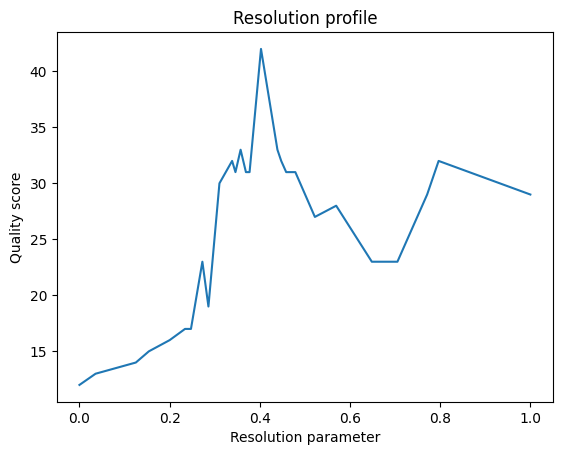

In [48]:
resolution_parameters = [partition.resolution_parameter for partition in profile]
quality_scores = [len(partition) for partition in profile]

# Plot the resolution profile
plt.plot(resolution_parameters, quality_scores)
plt.xlabel("Resolution parameter")
plt.ylabel("Quality score")
plt.title("Resolution profile")
plt.show()

In [72]:
optimiser = la.Optimiser()
profile1 = optimiser.resolution_profile(subG, la.RBConfigurationVertexPartition, weights='weight',
                                       resolution_range=(0,10))

381it [00:00, 985.44it/s, resolution_parameter=0.739]


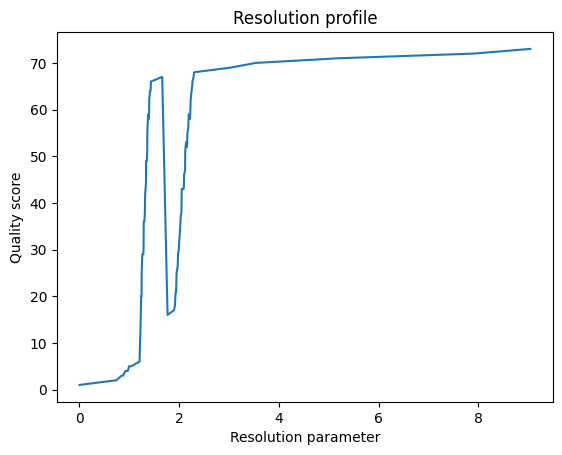

In [73]:
resolution_parameters = [partition.resolution_parameter for partition in profile1]
quality_scores = [len(partition) for partition in profile1]

# Plot the resolution profile
plt.plot(resolution_parameters, quality_scores)
plt.xlabel("Resolution parameter")
plt.ylabel("Quality score")
plt.title("Resolution profile")
plt.show()

In [85]:
queue_obj = Queue()
G = nx.Graph()
for topic, towards in Coocjson.items():
    for toward, times in towards.items():
        if topic != toward:
            G.add_edge(topic, toward, weight=times)
queue_obj.put(ig.Graph.from_networkx(G))
ps = []
rep = []
while not queue_obj.empty():
    curG = queue_obj.get()
    # G2 = ig.Graph.from_networkx(curG)
    # if curG.vcount() > 20:
    #     mp = curG.vcount() // 2
    # else:
    mp = 0
    rp = 1
    while rp >= 0:
        partition1 = la.find_partition(curG, la.RBConfigurationVertexPartition, weights='weight', n_iterations=-1, resolution_parameter=rp, max_comm_size=mp)
        membership = partition1.membership
        # compute the number of communities larger than 3
        comsize = partition1.sizes()
        cl3 = sum(i > 3 for i in comsize)
        if cl3 <= 10:
            break
        rp -= 0.05
    n_communities = len(set(membership))
    # partition = cd.leiden(curG, weights='weight')
    if n_communities == 1:
        continue
    communities = []
    for community_id in range(n_communities):
        community_members = [i for i, c in enumerate(membership) if c == community_id]
        community_member_names = []
        for i in community_members:
            community_member_names.append(curG.vs['_nx_name'][i])
        communities.append(community_member_names)

        subG = curG.subgraph(community_members)
        strengths = subG.strength()
        max_strength = max(strengths)
        node_index = strengths.index(max_strength)
        # md = 0
        # for node in subG.nodes:
        #     if subG.degree[node] > md:
        #         md = subG.degree[node]
        #         mt = node
        rep.append((curG.vs['_nx_name'][node_index], len(community_members)))
        if len(community_members) > 3 and not subG.is_tree():
            queue_obj.put(subG)
    ps.append(communities)
    # for com in partition.communities:
    #     subG = curG.subgraph(com)
    #     md = 0
    #     for node in subG.nodes:
    #         if subG.degree[node] > md:
    #             md = subG.degree[node]
    #             mt = node
    #     rep.append((mt, len(com)))
    #     if len(com) > 3 and not nx.is_tree(subG):
    #         queue_obj.put(subG)
    print(queue_obj.qsize())
with open('Partition/fre10.json', 'w') as opfile:
    opfile.write(json.dumps(ps))
with open('Partition/rep10.json', 'w') as opfile:
    opfile.write(json.dumps(rep))

9
18
27
36
43
46
51
60
69
77
86
95
104
110
114
116
125
134
142
146
147
149
150
150
151
150
157
165
174
183
190
193
195
196
197
198
202
206
209
212
213
213
212
214
214
214
219
226
231
237
243
249
251
255
259
260
269
277
281
286
292
296
301
306
307
307
315
323
330
336
341
345
350
354
356
358
365
368
377
383
386
387
391
391
391
398
404
409
414
421
425
428
432
436
438
442
445
450
454
457
462
464
465
465
465
474
479
484
486
488
490
491
492
492
492
495
501
503
505
506
506
506
507
507
505
505
513
522
529
535
540
543
546
549
550
550
559
564
571
574
580
581
582
583
583
588
594
600
604
608
612
613
613
612
614
616
617
616
617
617
616
615
615
616
621
625
629
633
635
638
644
650
654
657
659
661
663
664
664
668
672
675
677
681
685
686
687
687
690
695
698
702
705
707
709
709
708
710
712
714
718
719
720
720
720
723
725
727
728
728
728
730
730
730
731
732
733
736
739
741
742
743
746
748
750
751
750
752
755
756
756
757
756
752
750
749
749
748
754
757
761
764
765
767
769
772
773
775
776
776
778
780
784
7

In [82]:
# comsize = partition1.sizes()
comsize = [9, 9, 10, 10, 1, 0, 2, 5, 1, 3, 4, 2]
# cl3 = len([i for i in comsize if i > 3])
count = sum(i > 3 for i in comsize)
print(count)

6


In [21]:
uts = set()
pps = []
for a in reversed(ps):
    nt = []
    for b in a:
        if b[0] in uts:
            nt.append(b)
            continue
        uts.add(b[0])
        if len(b) < 4:
            nt.append(b)
            continue
        pnodesid = [namedict[name] for name in b]
        # G2 = ig.Graph.from_networkx(G)
        subG = G2.subgraph(pnodesid)
        dg = subG.degree()
        if not 1 in dg:
            nt.append(b)
            continue
        nb = [[]]
        for i in range(len(dg)):
            if dg[i] == 1:
                nb.append([subG.vs['_nx_name'][i]])
            else:
                nb[0].append(subG.vs['_nx_name'][i])
        nt.append(nb)
    pps = [nt] + pps
with open('Partition/freleaf.json', 'w') as opfile:
    opfile.write(json.dumps(pps, indent=1))

In [26]:
sts = set()
for a in pps:
    for b in a:
        if not isinstance(b[0], list):
            continue
        for c in b[1:]:
            sts.add(c[0])
for topic in corTopics:
    if topic in sts:
        print(topic)

wagtail


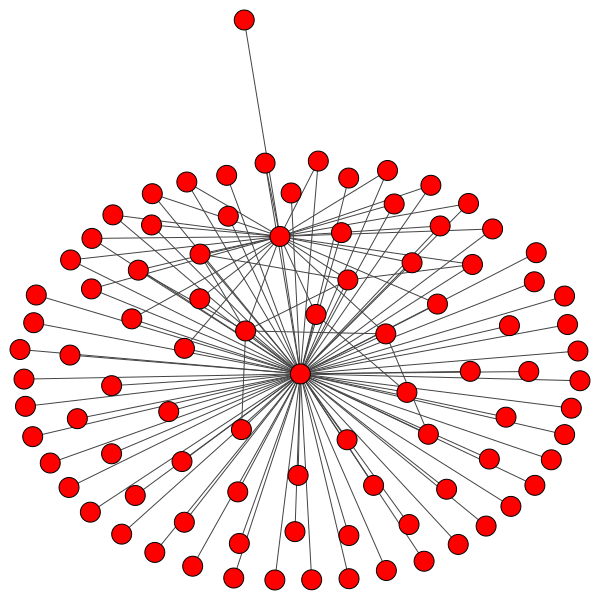

In [5]:
pnodes =  [
   "python",
   "python-3.x",
   "utility-library",
   "python2",
   "python-scripts",
   "python-library",
   "python-2.x",
   "swrepo",
   "twelve-factor",
   "python-imaging-library",
   "plone",
   "pygame",
   "3rd-party",
   "multiprocessing",
   "cython",
   "python-framework",
   "python-wrapper",
   "research-tool",
   "loss",
   "python27",
   "information-theory",
   "python-module",
   "setuptools",
   "pybind11",
   "heroku-deployment",
   "sympy",
   "investigative-journalism",
   "hdf5",
   "spiders",
   "biomedical-image-processing",
   "tomography",
   "nueral-networks",
   "python-tutorial",
   "python-extension",
   "spherical-harmonics",
   "high-dimensional-data",
   "sdk-python",
   "predictions",
   "logfile",
   "numba",
   "motion-detection",
   "file-formats",
   "geetest",
   "autoit",
   "runtime-typechecking",
   "python-bindings",
   "python-spider",
   "python-tutorials",
   "real-estate",
   "python-3-6",
   "python-api",
   "compound",
   "python-client",
   "newsapi",
   "ide-features",
   "traceback",
   "trend",
   "educators",
   "subprocess",
   "100daysofcode",
   "statistical-inference",
   "annotated",
   "customisable",
   "clarifai",
   "humans",
   "graphite-components",
   "console-app",
   "scylla",
   "scipy-stack",
   "deta",
   "tqdm",
   "flower",
   "basics",
   "inotify",
   "jakubroztocil",
   "data-gathering",
   "backtrader",
   "healthchecks",
   "gphoto2",
   "ultrasound",
   "google-ads-api",
   "commandline-tool",
   "python-programming",
   "vcr",
   "metamodel",
   "coupons",
   "factor-analysis",
   "weibospider",
   "c-extension",
   "inkscape-extension",
   "promotion"
  ]
pnodesid = [namedict[name] for name in pnodes]
# G2 = ig.Graph.from_networkx(G)
subG = G2.subgraph(pnodesid)
ig.plot(subG)

In [ ]:
for p in ps:
    